Number of Clusters: 3, Silhouette Score: 0.3606
Number of Clusters: 4, Silhouette Score: 0.4233
Number of Clusters: 5, Silhouette Score: 0.4053
Number of Clusters: 6, Silhouette Score: 0.3783
Number of Clusters: 7, Silhouette Score: 0.3620
Number of Clusters: 8, Silhouette Score: 0.3759
Number of Clusters: 9, Silhouette Score: 0.3817
Number of Clusters: 10, Silhouette Score: 0.3944


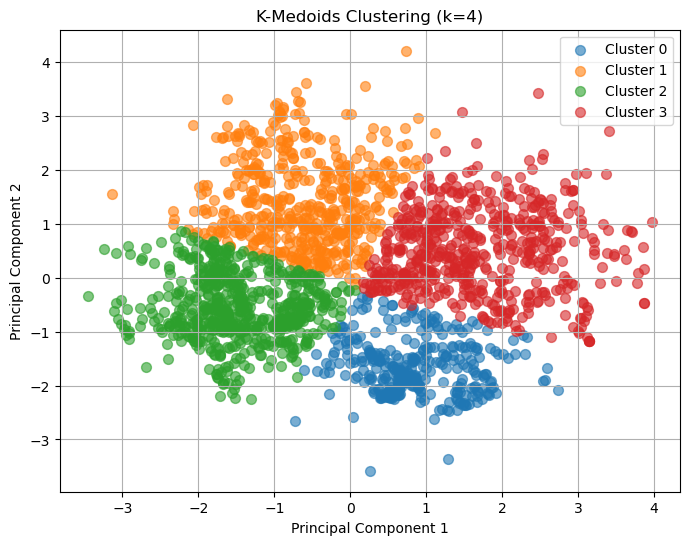

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

# Step 1: Load the dataset
# Replace 'your_dataset_path.csv' with the actual path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Drop the class label column
# Replace 'Broad_Class' or 'Broad_Class_Encoded' with the actual class label column names
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Normalize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

# Step 4: Reduce the data to 2D using PCA (optional, for visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Step 5: Perform K-Medoids clustering for a range of k values (3 to 10)
k_values = range(3, 11)
silhouette_scores = {}

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    labels = kmedoids.fit_predict(reduced_data)
    silhouette_scores[k] = silhouette_score(reduced_data, labels)

# Step 6: Display the Silhouette Scores
for k, score in silhouette_scores.items():
    print(f"Number of Clusters: {k}, Silhouette Score: {score:.4f}")

# Step 7: Visualize the best clustering result (choose optimal k)
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
kmedoids_optimal = KMedoids(n_clusters=optimal_k, random_state=42)
labels_optimal = kmedoids_optimal.fit_predict(reduced_data)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for cluster in set(labels_optimal):
    cluster_data = reduced_data[labels_optimal == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}", s=50, alpha=0.6)

plt.title(f"K-Medoids Clustering (k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


Silhouette Scores for K-Medoids with PCA:
Number of Clusters: 4, Silhouette Score: 0.8312
Number of Clusters: 5, Silhouette Score: 0.6476
Number of Clusters: 6, Silhouette Score: 0.4640
Number of Clusters: 7, Silhouette Score: 0.4271
Number of Clusters: 8, Silhouette Score: 0.4358
Number of Clusters: 9, Silhouette Score: 0.4512
Number of Clusters: 10, Silhouette Score: 0.4650


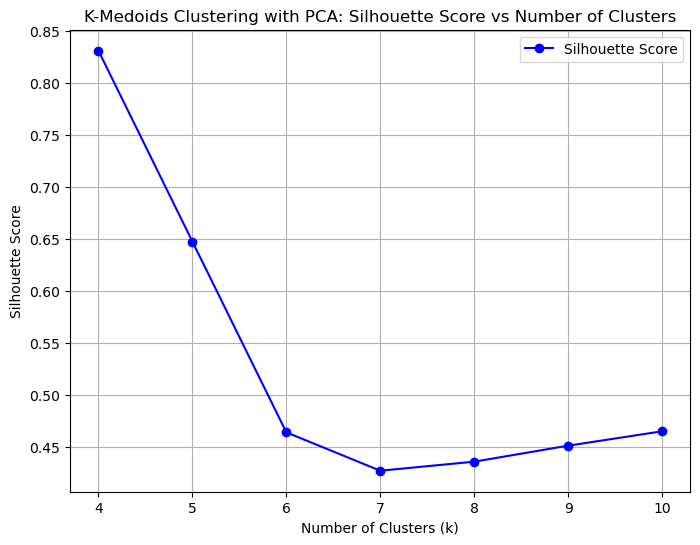

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your dataset path

# Step 2: Drop the class label columns
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform K-Medoids for a range of k values (4 to 10) on PCA-reduced data
k_values = range(4, 11)
silhouette_scores_kmedoids_pca = {}

for k in k_values:
    kmedoids_model = KMedoids(n_clusters=k, random_state=42, method='pam')  # PAM method
    labels = kmedoids_model.fit_predict(reduced_data)  # Use PCA-reduced data
    silhouette_scores_kmedoids_pca[k] = silhouette_score(reduced_data, labels)

# Step 6: Display Silhouette Scores
print("Silhouette Scores for K-Medoids with PCA:")
for k, score in silhouette_scores_kmedoids_pca.items():
    print(f"Number of Clusters: {k}, Silhouette Score: {score:.4f}")

# Step 7: Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(list(silhouette_scores_kmedoids_pca.keys()), 
         list(silhouette_scores_kmedoids_pca.values()), 
         marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-Medoids Clustering with PCA: Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
x